In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
data = pd.read_csv('tweets.csv')  # Replace with the path to your dataset

# Tokenize tweets
data['Tokenized_Tweet'] = data['Tweet'].apply(lambda x: word_tokenize(str(x)))

# Load SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def calculate_sentiment_score(tokens):
    sentiment_scores = [sid.polarity_scores(token)['compound'] for token in tokens]
    return sum(sentiment_scores) / len(sentiment_scores)

# Calculate sentiment score for each tweet
data['Sentiment_Score'] = data['Tokenized_Tweet'].apply(calculate_sentiment_score)

# Assign sentiment label based on sentiment score
def assign_sentiment_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Sentiment_Score'].apply(assign_sentiment_label)

# Now, data dataframe will have 'Sentiment' column containing the assigned sentiment labels

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Select relevant columns
data = data[['Tweet', 'Sentiment']]  # Assuming 'Tweet' is the column containing tweet text and 'Sentiment' is the column containing sentiment labels

# Tokenize the text
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['Tweet'])
X = tokenizer.texts_to_sequences(data['Tweet'])
X = pad_sequences(X, maxlen=128)

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiment'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128),
    LSTM(128),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
750/750 [==============================] - 17s 19ms/step - loss: 0.0874 - accuracy: 0.9841 - val_loss: 0.0484 - val_accuracy: 0.9898
Epoch 2/10
750/750 [==============================] - 14s 18ms/step - loss: 0.0304 - accuracy: 0.9912 - val_loss: 0.0453 - val_accuracy: 0.9915
Epoch 3/10
750/750 [==============================] - 14s 18ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0563 - val_accuracy: 0.9855
Epoch 4/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0512 - val_accuracy: 0.9920
Epoch 5/10
750/750 [==============================] - 14s 18ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0512 - val_accuracy: 0.9895
Epoch 6/10
750/750 [==============================] - 14s 19ms/step - loss: 9.5556e-04 - accuracy: 0.9998 - val_loss: 0.0934 - val_accuracy: 0.9698
Epoch 7/10
750/750 [==============================] - 14s 19ms/step - loss: 3.6898e-04 - accuracy: 0.9999 - val_loss: 0.0677 - val_a

In [3]:
# Evaluate the model
y_pred_prob = lstm_model.predict(X_test)
y_pred = tf.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))

188/188 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        78
           1       0.99      1.00      0.99      5908
           2       0.56      0.71      0.63        14

    accuracy                           0.99      6000
   macro avg       0.75      0.76      0.75      6000
weighted avg       0.99      0.99      0.99      6000



In [4]:
lstm_model.save("lstm_model.h5")

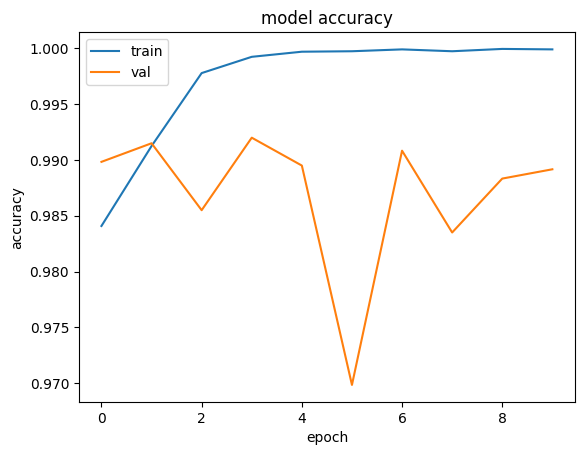

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

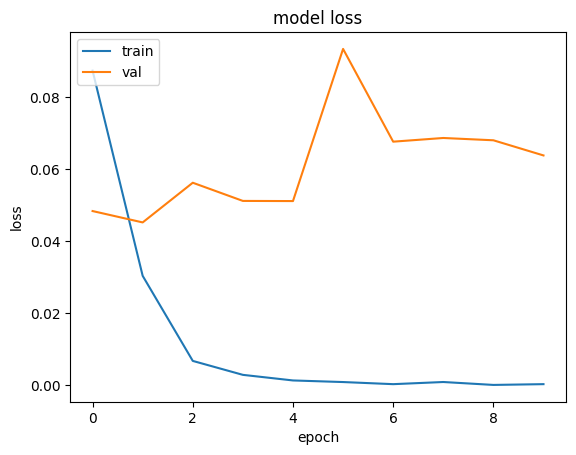

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
y_pred

<tf.Tensor: shape=(6000,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1], dtype=int64)>